# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
filepath1='/content/drive/MyDrive/Telecom/dim_cities.csv'
filepath2='/content/drive/MyDrive/Telecom/dim_date.csv'
filepath3='/content/drive/MyDrive/Telecom/dim_plan.csv'
filepath4='/content/drive/MyDrive/Telecom/fact_market_share.csv'
filepath5='/content/drive/MyDrive/Telecom/fact_plan_revenue.csv'
filepath6='/content/drive/MyDrive/Telecom/fact_atliqo_metrics.xlsx'

In [ ]:
dim_city=pd.read_csv(filepath1)
dim_date=pd.read_csv(filepath2)
dim_plan=pd.read_csv(filepath3)
fact_marketshare=pd.read_csv(filepath4)
fact_planrevenue=pd.read_csv(filepath5)
fact_metrics=pd.read_excel(filepath6)

In [ ]:
dim_city.head()

,city_code,city_name
0,400001,Mumbai
1,110001,Delhi
2,700001,Kolkata
3,560001,Bangalore
4,600001,Chennai


In [ ]:
dim_date.head()

,date,month_name,before/after_5g,time_period
0,2022-01-01,Jan,Before 5G,1
1,2022-02-01,Feb,Before 5G,2
2,2022-03-01,Mar,Before 5G,3
3,2022-04-01,Apr,Before 5G,4
4,2022-06-01,Jun,After 5G,1


In [ ]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             8 non-null      object
 1   month_name       8 non-null      object
 2   before/after_5g  8 non-null      object
 3   time_period      8 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 384.0+ bytes


In [ ]:
dim_plan.head()

,plan,plan_description
0,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
1,p2,Super Saviour Pack (1.5 GB / Day Combo For 56 ...
2,p3,Elite saver Pack (1 GB/ Day) Valid: 28 Days
3,p4,Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days
4,p5,Rs. 99 Full Talktime Combo Pack


In [ ]:
fact_marketshare.head()

,date,city_code,tmv_city_crores,company,ms_pct
0,2022-01-01,400001,286.29,Atliqo,21.20
1,2022-01-01,110001,241.59,Atliqo,17.68
2,2022-01-01,700001,222.19,Atliqo,16.61
3,2022-01-01,560001,195.41,Atliqo,19.14
4,2022-01-01,600001,166.78,Atliqo,18.47


In [ ]:
fact_marketshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             600 non-null    object 
 1   city_code        600 non-null    int64  
 2   tmv_city_crores  600 non-null    float64
 3   company          600 non-null    object 
 4   ms_pct           600 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
fact_planrevenue.head()

,date,city_code,plans,plan_revenue_crores
0,2022-01-01,400001,p1,6.26
1,2022-01-01,110001,p1,4.58
2,2022-01-01,700001,p1,4.29
3,2022-01-01,560001,p1,4.26
4,2022-01-01,600001,p1,3.60


In [ ]:
fact_planrevenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1200 non-null   datetime64[ns]
 1   city_code            1200 non-null   int64         
 2   plans                1200 non-null   object        
 3   plan_revenue_crores  1200 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 37.6+ KB


In [ ]:
fact_metrics.head()

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs
0,2022-01-01,400001,Atliqo,60.69,192,31.61,1.90
1,2022-01-01,110001,Atliqo,42.71,175,24.41,1.31
2,2022-01-01,700001,Atliqo,36.91,175,21.09,1.25
3,2022-01-01,560001,Atliqo,37.40,175,21.37,1.39
4,2022-01-01,600001,Atliqo,30.80,203,15.17,1.12


In [ ]:
fact_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      120 non-null    datetime64[ns]
 1   city_code                 120 non-null    int64         
 2   company                   120 non-null    object        
 3   atliqo_revenue_crores     120 non-null    float64       
 4   arpu                      120 non-null    int64         
 5   active_users_lakhs        120 non-null    float64       
 6   unsubscribed_users_lakhs  120 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 6.7+ KB


# Data cleaning

In [ ]:
# Data Type Change
dim_date['date']=pd.to_datetime(dim_date['date'])
fact_marketshare['date']=pd.to_datetime(fact_marketshare['date'])
fact_planrevenue['date']=pd.to_datetime(fact_planrevenue['date'])

# Data Analysis

In [ ]:
# Total Revenue,Average Arpu,Total Active user, Total Unsubscribed user
Revenue=fact_metrics['atliqo_revenue_crores'].sum()
ARPU=fact_metrics['arpu'].mean()
Active_users=fact_metrics['active_users_lakhs'].sum()
Unsubscribed_users=fact_metrics['unsubscribed_users_lakhs'].sum()

In [ ]:
'Total Revenue' ,Revenue,'Crore'

('Total Revenue', 3187.36, 'Crore')

In [ ]:
df1=pd.merge(dim_date,fact_metrics,how='left',on='date')
df=pd.merge(dim_city,df1,how='left',on='city_code')
df.head()

,city_code,city_name,date,month_name,before/after_5g,time_period,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs
0,400001,Mumbai,2022-01-01,Jan,Before 5G,1,Atliqo,60.69,192,31.61,1.90
1,400001,Mumbai,2022-02-01,Feb,Before 5G,2,Atliqo,61.19,169,36.21,2.71
2,400001,Mumbai,2022-03-01,Mar,Before 5G,3,Atliqo,57.28,213,26.89,2.33
3,400001,Mumbai,2022-04-01,Apr,Before 5G,4,Atliqo,65.24,213,30.63,2.64
4,400001,Mumbai,2022-06-01,Jun,After 5G,1,Atliqo,62.09,193,32.17,2.41


# Citywise Revenue, ARPU, Active users, Unsubscribed Users

In [ ]:
# Citywise Revenue Before & After 5G
before_5G_revenue=df[df['before/after_5g']=='Before 5G'].groupby('city_name').agg({'atliqo_revenue_crores':'sum'}).rename(columns={'atliqo_revenue_crores':'Before 5G revenue'})
after_5G_revenue=df[df['before/after_5g']=='After 5G'].groupby('city_name').agg({'atliqo_revenue_crores':'sum'}).rename(columns={'atliqo_revenue_crores':'After 5G revenue'})

In [ ]:
city_revenue=pd.merge(before_5G_revenue,after_5G_revenue,how='inner',on='city_name')
city_revenue['Percentage Change']=((city_revenue['After 5G revenue']/city_revenue['Before 5G revenue'])-1)*100
city_revenue.sort_values(by=['Percentage Change'],ascending=False)

,Before 5G revenue,After 5G revenue,Percentage Change
city_name,,,
Lucknow,64.83,66.01,1.820145
Gurgaon,27.12,27.53,1.511799
Patna,48.74,49.46,1.477226
Raipur,15.68,15.86,1.147959
Jaipur,70.09,70.78,0.984449
Bangalore,168.67,169.94,0.752950
Pune,129.64,130.12,0.370256
Mumbai,244.40,245.15,0.306874
Coimbatore,45.67,45.72,0.109481


Text(0.5, 1.0, 'Citywise Revenue')

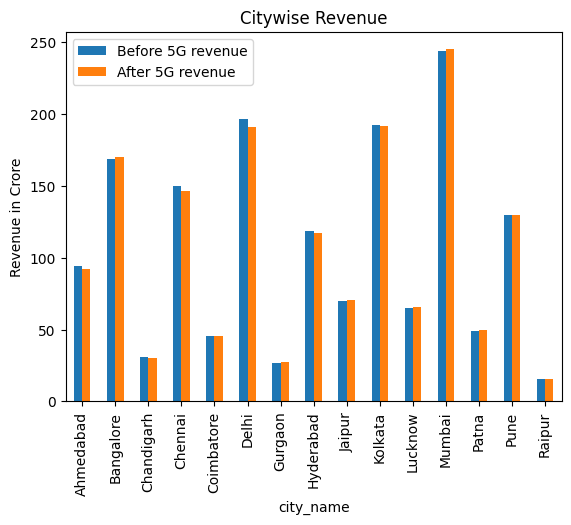

In [ ]:
city_revenue[['Before 5G revenue','After 5G revenue']].plot(kind='bar')
plt.ylabel('Revenue in Crore')
plt.title('Citywise Revenue')

# Insights
Revenue is incresed in every city expect six cities. These cities are Delhi, Chennai, Ahmedabad,Hyderabad,Chandigarh and koltata. Atliq should give more focus these cities as these cities are tier 1 cities of India. We can improve our services in these cities or we can launch new plans of 5G for these cities to improve revenue in these cities.

In [ ]:
# Average ARPU Before & After 5G
before_5G_ARPU=df[df['before/after_5g']=='Before 5G'].groupby('city_name').agg({'arpu':'mean'}).rename(columns={'arpu':'Before 5G ARPU'})
after_5G_ARPU=df[df['before/after_5g']=='After 5G'].groupby('city_name').agg({'arpu':'mean'}).rename(columns={'arpu':'After 5G ARPU'})

In [ ]:
city_ARPU=pd.merge(before_5G_ARPU,after_5G_ARPU,how='inner',on='city_name')
city_ARPU['Percentage_change']=((city_ARPU['After 5G ARPU']/city_ARPU['Before 5G ARPU'])-1)*100
city_ARPU['Percentage_change']=city_ARPU['Percentage_change'].round(2)
city_ARPU.sort_values(by='Percentage_change',ascending=False)

,Before 5G ARPU,After 5G ARPU,Percentage_change
city_name,,,
Raipur,184.25,225.25,22.25
Ahmedabad,176.25,214.75,21.84
Patna,192.50,231.50,20.26
Bangalore,174.75,209.00,19.60
Delhi,181.50,214.50,18.18
Mumbai,196.75,231.00,17.41
Gurgaon,183.50,214.50,16.89
Hyderabad,196.50,217.25,10.56
Chandigarh,182.50,200.75,10.00


Text(0.5, 1.0, 'Citywise Average ARPU')

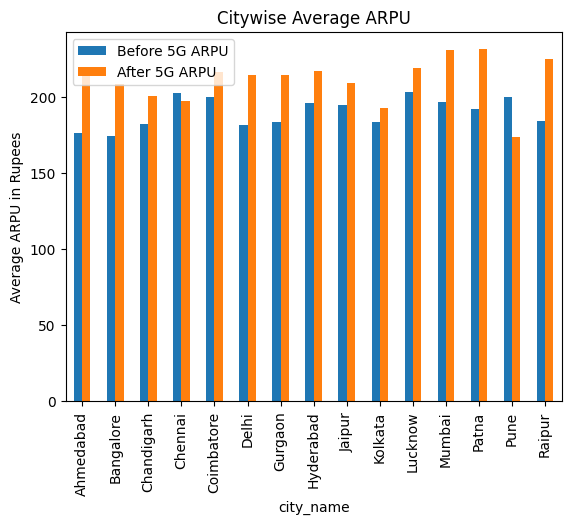

In [ ]:
city_ARPU[['Before 5G ARPU','After 5G ARPU']].plot(kind='bar')
plt.ylabel('Average ARPU in Rupees')
plt.title('Citywise Average ARPU')

# Insights
ARPU(Average Revenue Per User) is incresed in most of the cities after launch of 5G what is a good sign for Atliq.We need to just see what happened in Chennai and Mumbai.

In [ ]:
# Active Users Before & After 5G
before_5G_active_users=df[df['before/after_5g']=='Before 5G'].groupby('city_name').agg({'active_users_lakhs':'sum'}).rename(columns={'active_users_lakhs':'Before 5G active users'})
after_5G_active_users=df[df['before/after_5g']=='After 5G'].groupby('city_name').agg({'active_users_lakhs':'sum'}).rename(columns={'active_users_lakhs':'After 5G active users'})

In [ ]:
city_Activeusers=pd.merge(before_5G_active_users,after_5G_active_users,how='inner',on='city_name')
city_Activeusers['Percentage_change']=((city_Activeusers['After 5G active users']/city_Activeusers['Before 5G active users'])-1)*100
city_Activeusers['Percentage_change']=city_Activeusers['Percentage_change'].round(2)
city_Activeusers.sort_values(by=['Percentage_change'],ascending=False)

,Before 5G active users,After 5G active users,Percentage_change
city_name,,,
Pune,64.51,76.16,18.06
Lucknow,31.71,32.55,2.65
Chennai,73.91,74.17,0.35
Kolkata,104.31,99.36,-4.75
Chandigarh,16.85,16.01,-4.99
Jaipur,36.14,34.14,-5.53
Hyderabad,60.60,56.07,-7.48
Coimbatore,23.17,21.02,-9.28
Gurgaon,14.74,12.81,-13.09


Text(0.5, 1.0, 'citywise Active users')

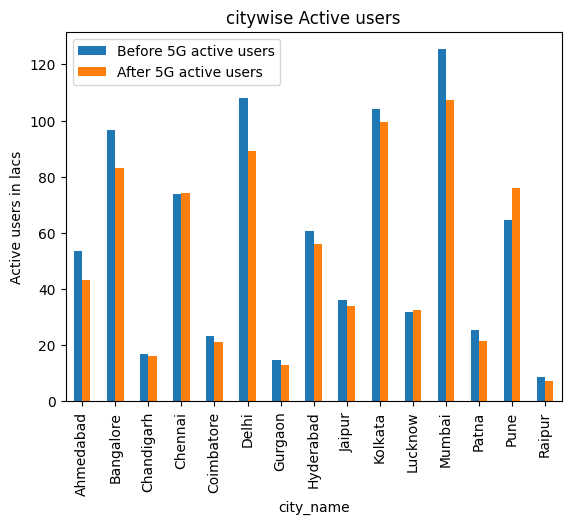

In [ ]:
city_Activeusers[['Before 5G active users','After 5G active users']].plot(kind='bar')
plt.ylabel('Active users in lacs')
plt.title('citywise Active users')

# Insights
Active customers are decresing. It may be due to bad 5G services or plan prices are higher as compared to competitiors.

In [ ]:
# Citywise Unsubscribed users
before_5G_unsubscribed_users=df[df['before/after_5g']=='Before 5G'].groupby('city_name').agg({'unsubscribed_users_lakhs':'sum'}).rename(columns={'unsubscribed_users_lakhs':'Before 5G unsubscribed users'})
after_5G_unsubscribed_users=df[df['before/after_5g']=='After 5G'].groupby('city_name').agg({'unsubscribed_users_lakhs':'sum'}).rename(columns={'unsubscribed_users_lakhs':'After 5G unsubscribed users'})

In [ ]:
city_unsubscribedusers=pd.merge(before_5G_unsubscribed_users,after_5G_unsubscribed_users,how='inner',on='city_name')
city_unsubscribedusers['Percentage change']=((city_unsubscribedusers['After 5G unsubscribed users']/city_unsubscribedusers['Before 5G unsubscribed users'])-1)*100
city_unsubscribedusers['Percentage change']=city_unsubscribedusers['Percentage change'].round(2)
city_unsubscribedusers.sort_values(by='Percentage change',ascending=False)

,Before 5G unsubscribed users,After 5G unsubscribed users,Percentage change
city_name,,,
Lucknow,1.72,3.06,77.91
Pune,4.34,6.74,55.30
Jaipur,2.23,3.40,52.47
Chandigarh,1.03,1.50,45.63
Hyderabad,3.86,5.33,38.08
Chennai,5.17,7.08,36.94
Kolkata,6.93,8.86,27.85
Coimbatore,1.55,1.96,26.45
Bangalore,5.71,6.89,20.67


Text(0.5, 1.0, 'Citywise Unsubscribed users')

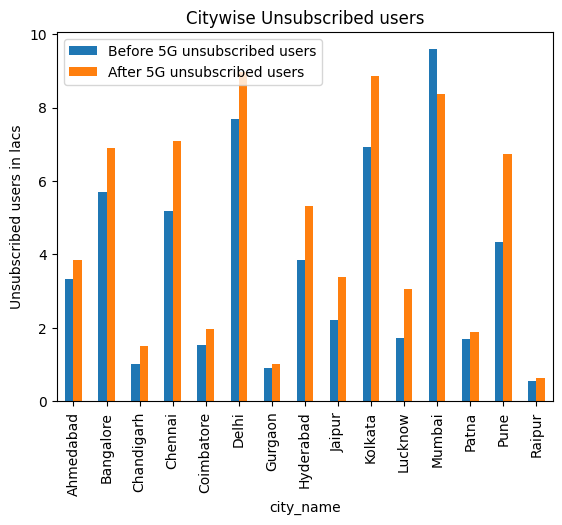

In [ ]:
city_unsubscribedusers[['Before 5G unsubscribed users','After 5G unsubscribed users']].plot(kind='bar')
plt.ylabel('Unsubscribed users in lacs')
plt.title('Citywise Unsubscribed users')

# Insights
Unsubscribed users of are increased in each city except Mumbai. So it may be due to very high prices of 5G plans as compared to 4G plans or maybe bad services.

# Revenue, ARPU, Active users, Unsubscribed users Trend with Time Period

In [ ]:
# Revenue trend
before_5G_revenue=df[df['before/after_5g']=='Before 5G'].groupby('time_period').agg({'atliqo_revenue_crores':'sum'}).rename(columns={'atliqo_revenue_crores':'Before 5G revenue'})
after_5G_revenue=df[df['before/after_5g']=='After 5G'].groupby('time_period').agg({'atliqo_revenue_crores':'sum'}).rename(columns={'atliqo_revenue_crores':'After 5G revenue'})

In [ ]:
revenue_trend=pd.merge(before_5G_revenue,after_5G_revenue,on='time_period')
revenue_trend['Percentage change']=revenue_trend['After 5G revenue']/revenue_trend['Before 5G revenue']
revenue_trend['Percentage change']=revenue_trend['Percentage change'].round(2)
revenue_trend

,Before 5G revenue,After 5G revenue,Percentage change
time_period,,,
1,354.37,357.56,1.01
2,425.69,412.76,0.97
3,410.45,419.08,1.02
4,407.19,400.26,0.98


Text(0.5, 1.0, 'Revenue trend with time')

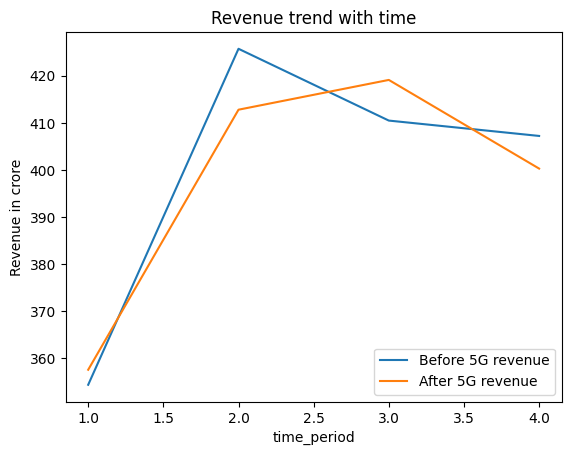

In [ ]:
revenue_trend[['Before 5G revenue','After 5G revenue']].plot(kind='line')
plt.ylabel('Revenue in crore')
plt.title('Revenue trend with time')

# Inights
Thought total revenue before and after 5G is approximately same.but for time period 4 we need to look into the matter what was happened that period. why revenue is decreased in time period as compared to time period 3?

In [ ]:
# ARPU Trend
before_5G_ARPU=df[df['before/after_5g']=='Before 5G'].groupby(['time_period']).agg({'arpu':'mean'}).rename(columns={'arpu':'Before 5G ARPU'})
after_5G_ARPU=df[df['before/after_5g']=='After 5G'].groupby(['time_period']).agg({'arpu':'mean'}).rename(columns={'arpu':'After 5G ARPU'})

In [ ]:
ARPU_trend=pd.merge(before_5G_ARPU,after_5G_ARPU,on='time_period')
ARPU_trend['Percentage change']=((ARPU_trend['After 5G ARPU']/ARPU_trend['Before 5G ARPU'])-1)*100
ARPU_trend['Percentage change']=ARPU_trend['Percentage change'].round(2)
ARPU_trend

,Before 5G ARPU,After 5G ARPU,Percentage change
time_period,,,
1,187.466667,217.800000,16.18
2,185.733333,202.466667,9.01
3,196.466667,209.533333,6.65
4,191.266667,215.200000,12.51


Text(0.5, 1.0, 'ARPU trend with Time Period')

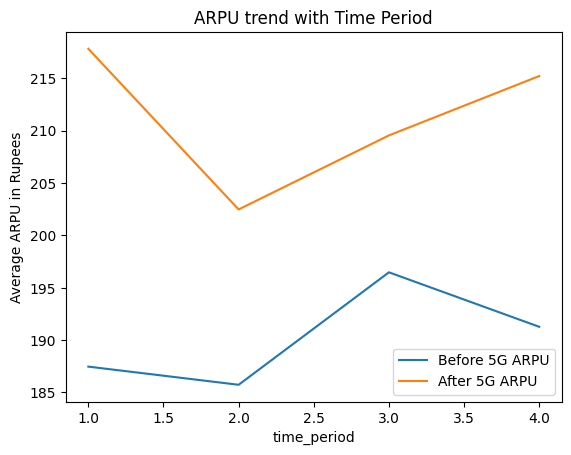

In [ ]:
ARPU_trend[['Before 5G ARPU','After 5G ARPU']].plot(kind='line')
plt.ylabel('Average ARPU in Rupees')
plt.title('ARPU trend with Time Period')

# Insights
ARPU incresed after 5G launch in every time period. but what happened in time period 2? It is a good sign for Atliq that ARPU started to improve from time period 2 after sudden decrease.

In [ ]:
# Active User Trend
before_5G_active_user=df[df['before/after_5g']=='Before 5G'].groupby(['time_period']).agg({'active_users_lakhs':'sum'}).rename(columns={'active_users_lakhs':'Before 5G active users'})
after_5G_active_user=df[df['before/after_5g']=='After 5G'].groupby(['time_period']).agg({'active_users_lakhs':'sum'}).rename(columns={'active_users_lakhs':'After 5G active users'})

Text(0.5, 1.0, 'Active users trend with Time Period')

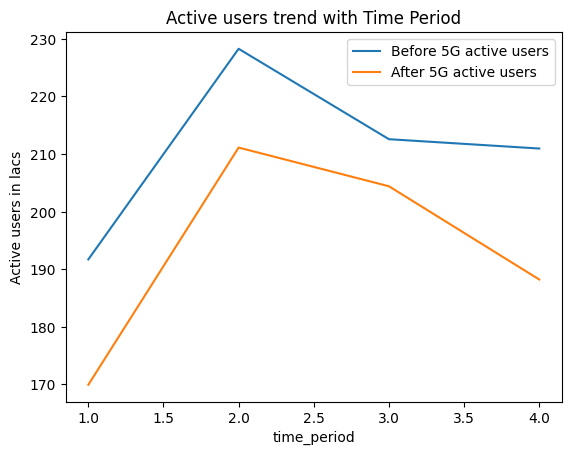

In [ ]:
Active_users_trend=pd.merge(before_5G_active_user,after_5G_active_user,on='time_period')
Active_users_trend.plot(kind='line')
plt.ylabel('Active users in lacs')
plt.title('Active users trend with Time Period')

# Insights
Active user is redcued after 5G as compared to before 5G. but here we have look what happed in time period 3 & 4 why Active user decresed in these two time period.

In [ ]:
# Unsubscribed user trend
before_5G_unsubscribed_user=df[df['before/after_5g']=='Before 5G'].groupby(['time_period']).agg({'unsubscribed_users_lakhs':'sum'}).rename(columns={'unsubscribed_users_lakhs':'Before 5G unsubscribed users'})
after_5G_unsubscribed_user=df[df['before/after_5g']=='After 5G'].groupby(['time_period']).agg({'unsubscribed_users_lakhs':'sum'}).rename(columns={'unsubscribed_users_lakhs':'After 5G unsubscribed users'})

Text(0.5, 1.0, 'Unsubscribed users trend with time period')

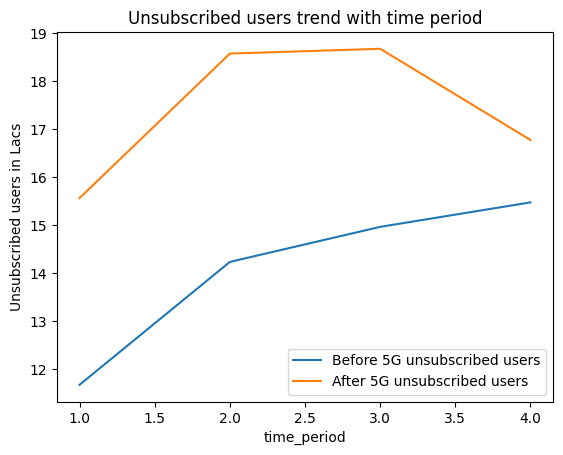

In [ ]:
pd.merge(before_5G_unsubscribed_user,after_5G_unsubscribed_user,on='time_period').plot(kind='line')
plt.ylabel('Unsubscribed users in Lacs')
plt.title('Unsubscribed users trend with time period')

# Insights
Unsubscribed users incresed after 5G but here good sign is that in time period 4 it started decreasing.

# Plan Analysis

Text(0.5, 1.0, 'Planwise Reveneue')

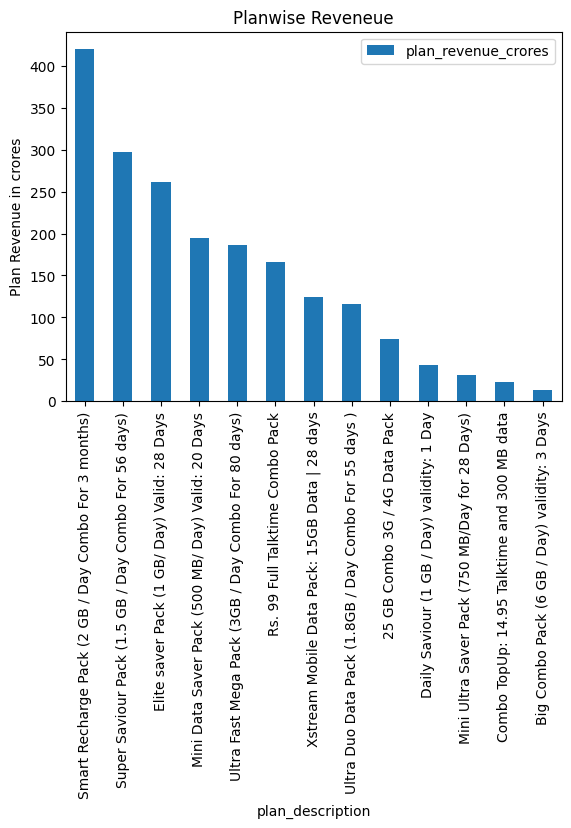

In [ ]:
# planwise Revenue
pd.merge(dim_plan,fact_planrevenue,how='left',left_on='plan',right_on='plans').groupby('plan_description').agg({'plan_revenue_crores':'sum'})
pd.merge(dim_plan,fact_planrevenue,how='left',left_on='plan',right_on='plans').groupby('plan_description').agg({'plan_revenue_crores':'sum'}).sort_values(by='plan_revenue_crores',ascending=False).plot(kind='bar')
plt.ylabel('Plan Revenue in crores')
plt.title('Planwise Reveneue')

In [ ]:
df1=pd.merge(dim_plan,fact_planrevenue,how='left',left_on='plan',right_on='plans')
df=pd.merge(dim_date,df1,on='date')
df

,date,month_name,before/after_5g,time_period,plan,plan_description,city_code,plans,plan_revenue_crores
0,2022-01-01,Jan,Before 5G,1,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,400001,p1,6.26
1,2022-01-01,Jan,Before 5G,1,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,110001,p1,4.58
2,2022-01-01,Jan,Before 5G,1,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,700001,p1,4.29
3,2022-01-01,Jan,Before 5G,1,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,560001,p1,4.26
4,2022-01-01,Jan,Before 5G,1,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,600001,p1,3.60
...,...,...,...,...,...,...,...,...,...
1195,2022-09-01,Sep,After 5G,4,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),800008,p13,0.19
1196,2022-09-01,Sep,After 5G,4,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),641001,p13,0.21
1197,2022-09-01,Sep,After 5G,4,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),160017,p13,0.15
1198,2022-09-01,Sep,After 5G,4,p13,Mini Ultra Saver Pack (750 MB/Day for 28 Days),122001,p13,0.09


In [ ]:
before_5G_plan=df[df['before/after_5g']=='Before 5G'].groupby('plan_description').agg({'plan_revenue_crores':'sum'}).rename(columns={'plan_revenue_crores':'Before 5G revenue'})
after_5G_plan=df[df['before/after_5g']=='After 5G'].groupby('plan_description').agg({'plan_revenue_crores':'sum'}).rename(columns={'plan_revenue_crores':'After 5G revenue'})

In [ ]:
plan_revenue=pd.merge(before_5G_plan,after_5G_plan,how='left',on='plan_description')
plan_revenue['Percentage change']=((plan_revenue['After 5G revenue']/plan_revenue['Before 5G revenue'])-1)*100
plan_revenue['Percentage change']=plan_revenue['Percentage change'].round(2)
plan_revenue.sort_values(by='Percentage change',ascending=False)

,Before 5G revenue,After 5G revenue,Percentage change
plan_description,,,
Smart Recharge Pack (2 GB / Day Combo For 3 months),181.27,238.66,31.66
Super Saviour Pack (1.5 GB / Day Combo For 56 days),148.80,148.73,-0.05
Elite saver Pack (1 GB/ Day) Valid: 28 Days,131.93,129.61,-1.76
Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days,107.54,87.68,-18.47
Xstream Mobile Data Pack: 15GB Data | 28 days,74.91,49.46,-33.97
Rs. 99 Full Talktime Combo Pack,100.46,65.15,-35.15
25 GB Combo 3G / 4G Data Pack,58.24,15.56,-73.28
Big Combo Pack (6 GB / Day) validity: 3 Days,13.11,NaN,NaN
Combo TopUp: 14.95 Talktime and 300 MB data,22.68,NaN,NaN


Text(0.5, 1.0, 'Planwise Revenue')

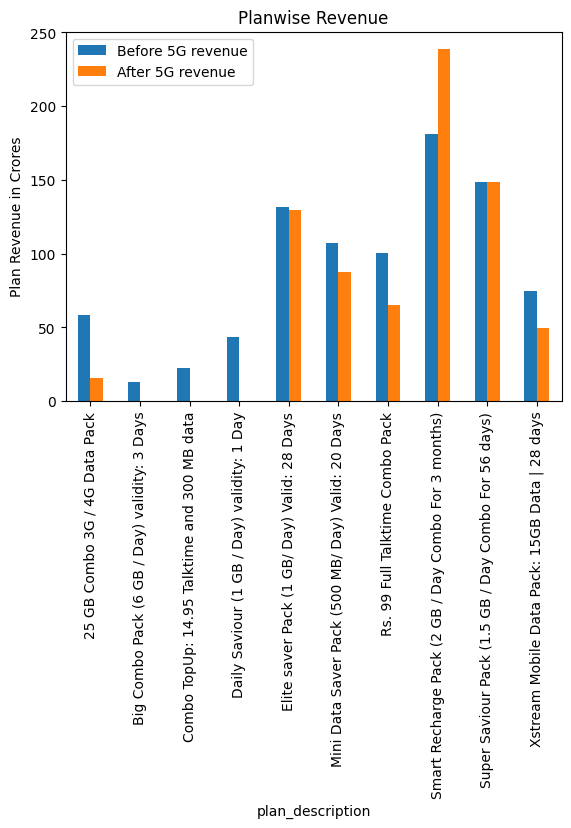

In [ ]:
plan_revenue[['Before 5G revenue','After 5G revenue']].plot(kind='bar')
plt.ylabel('Plan Revenue in Crores')
plt.title('Planwise Revenue')

In [ ]:
before_5G_plan_revenue=df[df['before/after_5g']=='Before 5G'].groupby('time_period').agg({'plan_revenue_crores':'sum'}).rename(columns={'plan_revenue_crores':'Before 5G plan revenue'})
after_5G_plan_revenue=df[df['before/after_5g']=='After 5G'].groupby('time_period').agg({'plan_revenue_crores':'sum'}).rename(columns={'plan_revenue_crores':'After 5G plan revenue'})

Text(0.5, 1.0, 'Plan Revenue trend with time period')

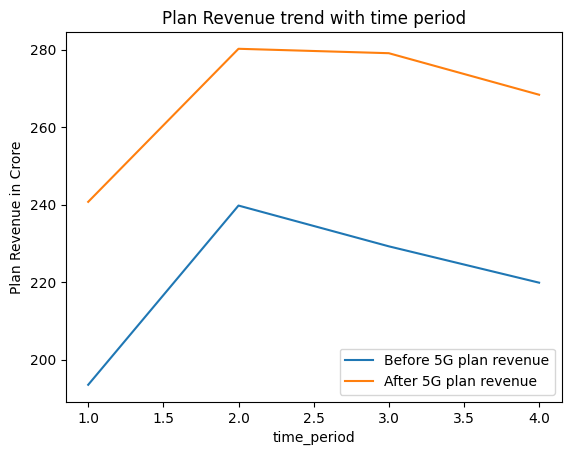

In [ ]:
pd.merge(before_5G_plan_revenue,after_5G_plan_revenue,on='time_period').plot(kind='line')
plt.ylabel('Plan Revenue in Crore')
plt.title('Plan Revenue trend with time period')

In [ ]:
df2=pd.merge(dim_city,df,how='left',on='city_code')
df2

,city_code,city_name,date,month_name,before/after_5g,time_period,plan,plan_description,plans,plan_revenue_crores
0,400001,Mumbai,2022-01-01,Jan,Before 5G,1,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...,p1,6.26
1,400001,Mumbai,2022-01-01,Jan,Before 5G,1,p2,Super Saviour Pack (1.5 GB / Day Combo For 56 ...,p2,4.87
2,400001,Mumbai,2022-01-01,Jan,Before 5G,1,p3,Elite saver Pack (1 GB/ Day) Valid: 28 Days,p3,4.17
3,400001,Mumbai,2022-01-01,Jan,Before 5G,1,p4,Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days,p4,3.48
4,400001,Mumbai,2022-01-01,Jan,Before 5G,1,p5,Rs. 99 Full Talktime Combo Pack,p5,3.13
...,...,...,...,...,...,...,...,...,...,...
1195,492001,Raipur,2022-09-01,Sep,After 5G,4,p6,Xstream Mobile Data Pack: 15GB Data | 28 days,p6,0.14
1196,492001,Raipur,2022-09-01,Sep,After 5G,4,p7,25 GB Combo 3G / 4G Data Pack,p7,0.05
1197,492001,Raipur,2022-09-01,Sep,After 5G,4,p11,Ultra Fast Mega Pack (3GB / Day Combo For 80 d...,p11,0.48
1198,492001,Raipur,2022-09-01,Sep,After 5G,4,p12,Ultra Duo Data Pack (1.8GB / Day Combo For 55 ...,p12,0.29


In [ ]:
before_5G=df2[df2['before/after_5g']=='Before 5G'].groupby('city_name').agg({'plan_revenue_crores':'sum'}).rename(columns={'plan_revenue_crores':'Before 5G plan Revenue'})
after_5G=df2[df2['before/after_5g']=='After 5G'].groupby('city_name').agg({'plan_revenue_crores':'sum'}).rename(columns={'plan_revenue_crores':'After 5G plan Revenue'})

Text(0.5, 1.0, 'Citywise Plan Revenue')

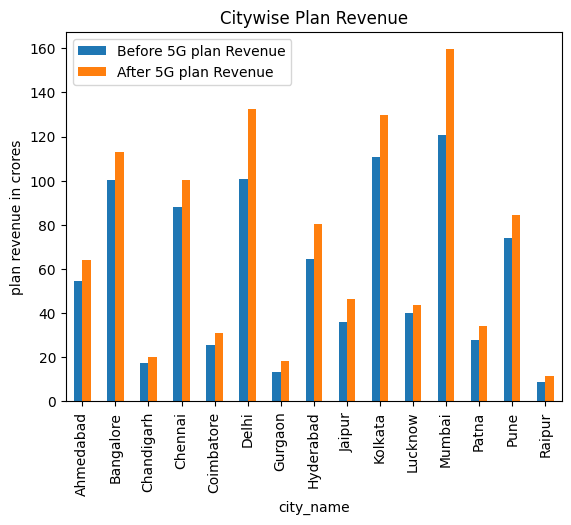

In [ ]:
pd.merge(before_5G,after_5G,how='inner',on='city_name').plot(kind='bar')
plt.ylabel('plan revenue in crores')
plt.title('Citywise Plan Revenue')

# Market Share Analysis

In [ ]:
df=pd.merge(dim_date,fact_marketshare,how='left',on='date').sort_values(by='time_period')

In [ ]:
ms_before_5G=df[df['before/after_5g']=='Before 5G'].groupby('company').agg({'ms_pct':'mean'}).rename(columns={'ms_pct':'Before 5G ms'})
ms_after_5G=df[df['before/after_5g']=='After 5G'].groupby('company').agg({'ms_pct':'mean'}).rename(columns={'ms_pct':'After 5G ms'})

In [ ]:
ms=pd.merge(ms_before_5G,ms_after_5G,how='inner',on='company')
ms['Before 5G ms']=ms['Before 5G ms'].round(2)
ms['After 5G ms']=ms['After 5G ms'].round(2)

Text(0.5, 1.0, 'Company wise Market share')

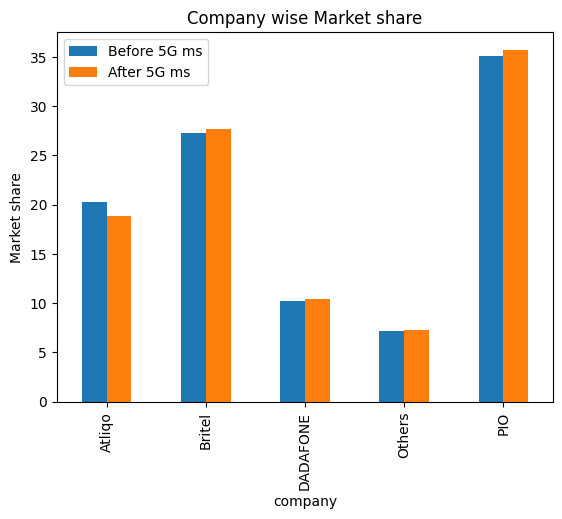

In [ ]:
ms[['Before 5G ms','After 5G ms']].plot(kind='bar')
plt.ylabel('Market share')
plt.title('Company wise Market share')

In [ ]:
df1=df.groupby(['month_name','time_period','company']).agg({'ms_pct':'mean'}).reset_index()
df1.sort_values(by='time_period')

,month_name,time_period,company,ms_pct
19,Jan,1,PIO,34.361333
29,Jun,1,PIO,34.820667
28,Jun,1,Others,7.313333
27,Jun,1,DADAFONE,10.378000
26,Jun,1,Britel,28.789333
25,Jun,1,Atliqo,18.703333
18,Jan,1,Others,7.217333
17,Jan,1,DADAFONE,10.238667
15,Jan,1,Atliqo,19.762000
16,Jan,1,Britel,28.420667


In [ ]:
pivot_data=df1.pivot(index='month_name',columns='company',values='ms_pct')

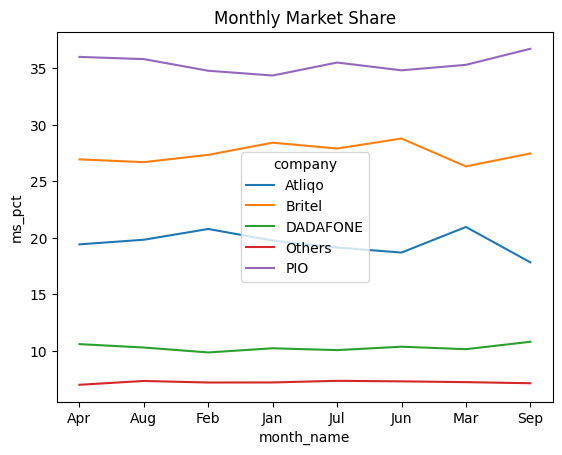

In [ ]:
pivot_data.plot(kind='line')
plt.xlabel('month_name')
plt.ylabel('ms_pct')
plt.title('Monthly Market Share')
plt.legend(title='company')
plt.show()

In [ ]:
MS_before_5G=df[(df['company']=='Atliqo') & (df['before/after_5g']=='Before 5G')].groupby('time_period').agg({'ms_pct':'mean'}).rename(columns={'ms_pct':'Before 5G MS'})
MS_after_5G=df[(df['company']=='Atliqo') & (df['before/after_5g']=='After 5G')].groupby('time_period').agg({'ms_pct':'mean'}).rename(columns={'ms_pct':'After 5G MS'})

Text(0.5, 1.0, 'Atliqo Market Share')

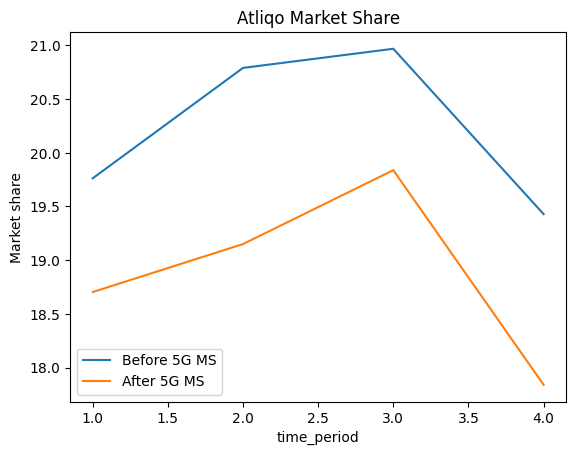

In [ ]:
pd.merge(MS_before_5G,MS_after_5G,on='time_period').plot(kind='line')
plt.ylabel('Market share')
plt.title('Atliqo Market Share')